**Khai báo thư viện**

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn import tree
from lightgbm import LGBMClassifier

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings(action = "ignore")


**Đọc dữ liệu**

In [141]:
df_cirrhosis = pd.read_csv('./input-data/cirrhosis.csv')
df_train= pd.read_csv("./input-data/train.csv")
df_cirrhosis = df_cirrhosis.rename(columns={'ID': 'id'})
#Gộp dữ liệu
df_train = pd.concat([df_cirrhosis, df_train], axis=0, ignore_index=True)

**Tổng quan về tập dữ liệu**

In [142]:
# Hiển thị số dòng, số cột dữ liệu
print('Số dòng của tập dữ liệu:', df_train.shape[0] )
print('Số cột của tập dữ liệu:', df_train.shape[1] )

Số dòng của tập dữ liệu: 8323
Số cột của tập dữ liệu: 20


In [143]:
# 10 dòng dữ liệu đầu tiên
df_train.head(10)

,id,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [144]:
# Cấu trúc dữ liệu
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323 entries, 0 to 8322
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8323 non-null   int64  
 1   N_Days         8323 non-null   int64  
 2   Status         8323 non-null   object 
 3   Drug           8217 non-null   object 
 4   Age            8323 non-null   int64  
 5   Sex            8323 non-null   object 
 6   Ascites        8217 non-null   object 
 7   Hepatomegaly   8217 non-null   object 
 8   Spiders        8217 non-null   object 
 9   Edema          8323 non-null   object 
 10  Bilirubin      8323 non-null   float64
 11  Cholesterol    8189 non-null   float64
 12  Albumin        8323 non-null   float64
 13  Copper         8215 non-null   float64
 14  Alk_Phos       8217 non-null   float64
 15  SGOT           8217 non-null   float64
 16  Tryglicerides  8187 non-null   float64
 17  Platelets      8312 non-null   float64
 18  Prothrom

**Tiền xử lý dữ liệu**

In [145]:
# Hiển thị các dữ liệu khuyết thiếu
df_train.count()

id               8323
N_Days           8323
Status           8323
Drug             8217
Age              8323
Sex              8323
Ascites          8217
Hepatomegaly     8217
Spiders          8217
Edema            8323
Bilirubin        8323
Cholesterol      8189
Albumin          8323
Copper           8215
Alk_Phos         8217
SGOT             8217
Tryglicerides    8187
Platelets        8312
Prothrombin      8321
Stage            8317
dtype: int64

In [146]:
# Xóa các dòng dữ liệu khuyết thiếu
df_train.dropna(inplace=True)
#Dữ liệu sau khi xử lý
df_train.count()

id               8181
N_Days           8181
Status           8181
Drug             8181
Age              8181
Sex              8181
Ascites          8181
Hepatomegaly     8181
Spiders          8181
Edema            8181
Bilirubin        8181
Cholesterol      8181
Albumin          8181
Copper           8181
Alk_Phos         8181
SGOT             8181
Tryglicerides    8181
Platelets        8181
Prothrombin      8181
Stage            8181
dtype: int64

In [147]:
#Loại bỏ thuộc tính không cần thiết
df_train.drop('id', axis = 1, inplace=True)

In [148]:
df_train.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [149]:
# Thống kê các giá trị định lượng
df_train.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000,8181.000000
mean,2028.452512,18366.944994,2.619423,351.260237,3.547260,84.471825,1822.813348,114.925595,115.665322,265.112333,10.633040,3.032759
std,1094.820580,3685.501456,3.844169,196.856060,0.348327,76.403770,1911.409689,49.105416,53.034271,87.658802,0.790593,0.866041
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,210.000000,10.000000,2.000000
50%,1831.000000,18701.000000,1.100000,299.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,392.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


**1. Ma trận tương quan**

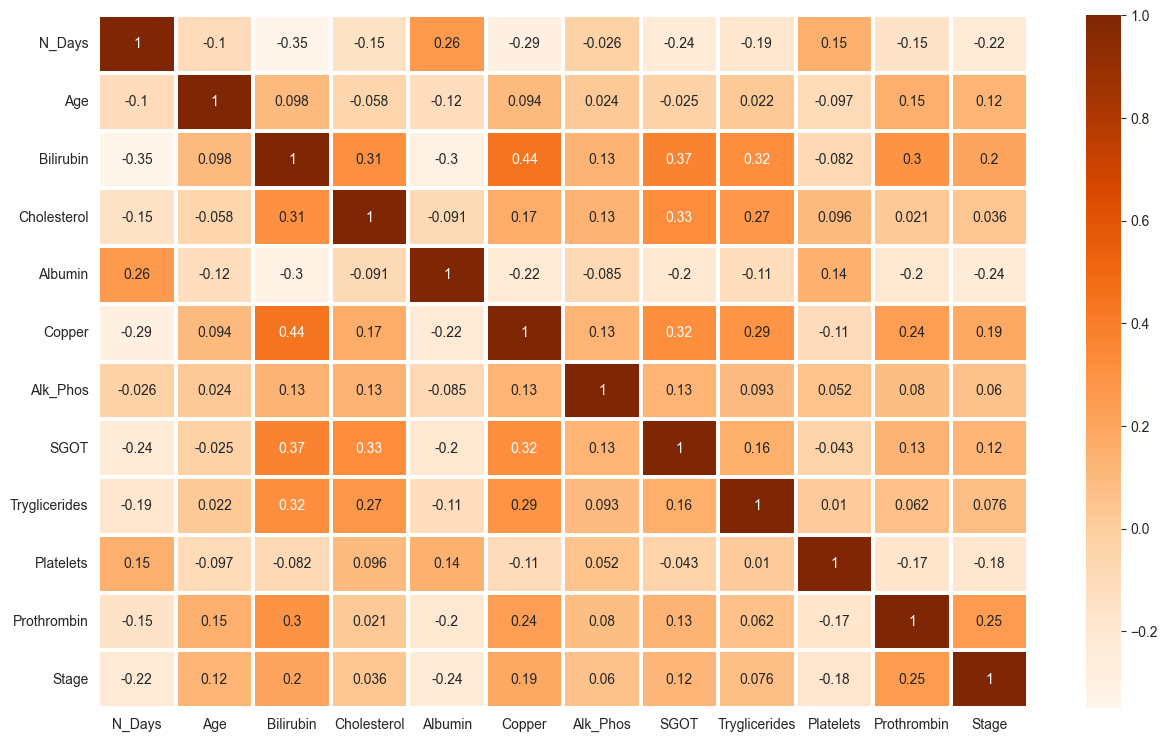

In [150]:
#Các cột dữ liệu định lượng
num_cols = ['N_Days','Age','Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin','Stage']
df_train_filter = df_train[num_cols]
corr = df_train_filter.corr()
plt.figure(figsize =(15,9))
sns.heatmap(corr, annot= True, cmap = 'Oranges', linewidths = 1.5)
plt.show()

**2. Các biểu đồ**

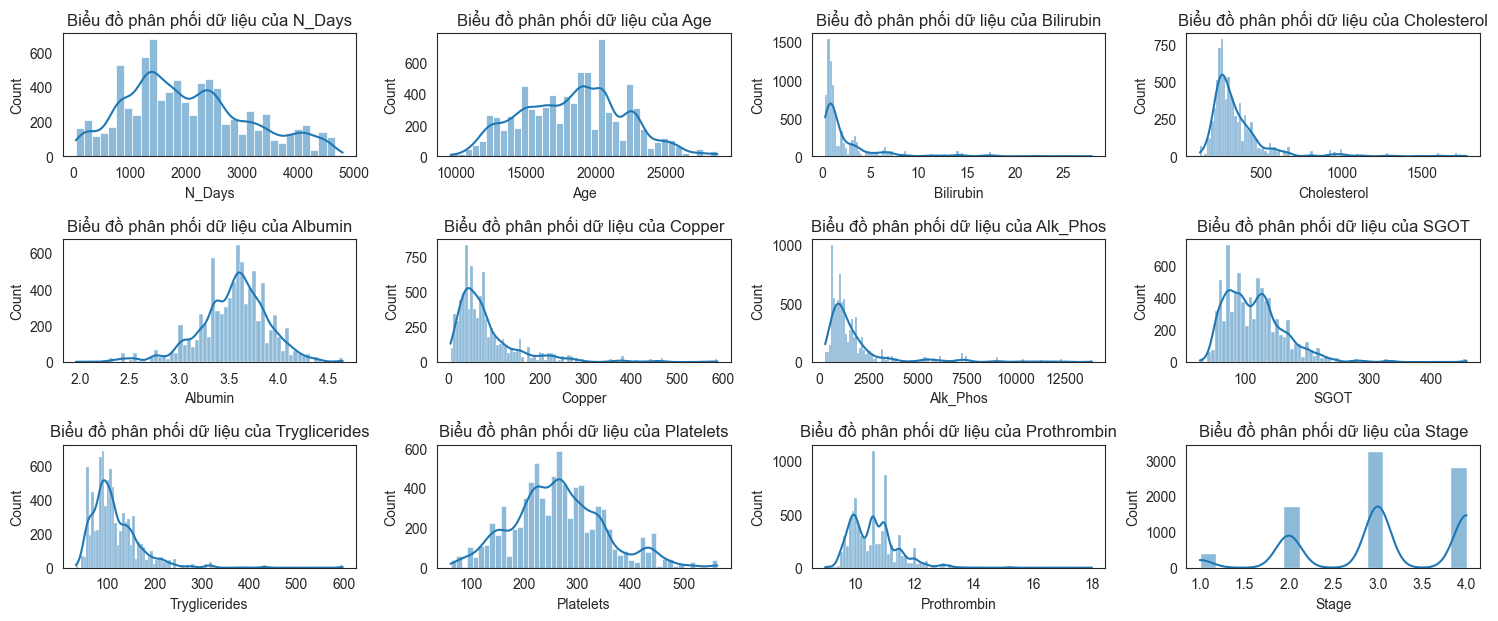

In [151]:
# Biểu đồ phân phối dữ liệu của các trường có thuộc tính định lượng
plt.figure(figsize = (15,10))
for i,col in enumerate (df_train_filter.columns,1):
    plt.subplot(5,4,i)
    plt.title(f"Biểu đồ phân phối dữ liệu của {col}")
    sns.histplot(df_train[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [152]:
# Các thuộc tính phân loại
cat_cols = list(set(df_train.columns) - set(num_cols))
df_train[cat_cols]

,Drug,Status,Ascites,Spiders,Edema,Sex,Hepatomegaly
0,D-penicillamine,D,Y,Y,Y,F,Y
1,D-penicillamine,C,N,Y,N,F,Y
2,D-penicillamine,D,N,N,S,M,N
3,D-penicillamine,D,N,Y,S,F,Y
4,Placebo,CL,N,Y,N,F,Y
...,...,...,...,...,...,...,...
8318,D-penicillamine,C,N,N,N,F,N
8319,Placebo,C,N,N,N,F,Y
8320,D-penicillamine,D,N,Y,S,F,N
8321,D-penicillamine,D,N,N,N,M,Y


**Biểu đồ boxplot**

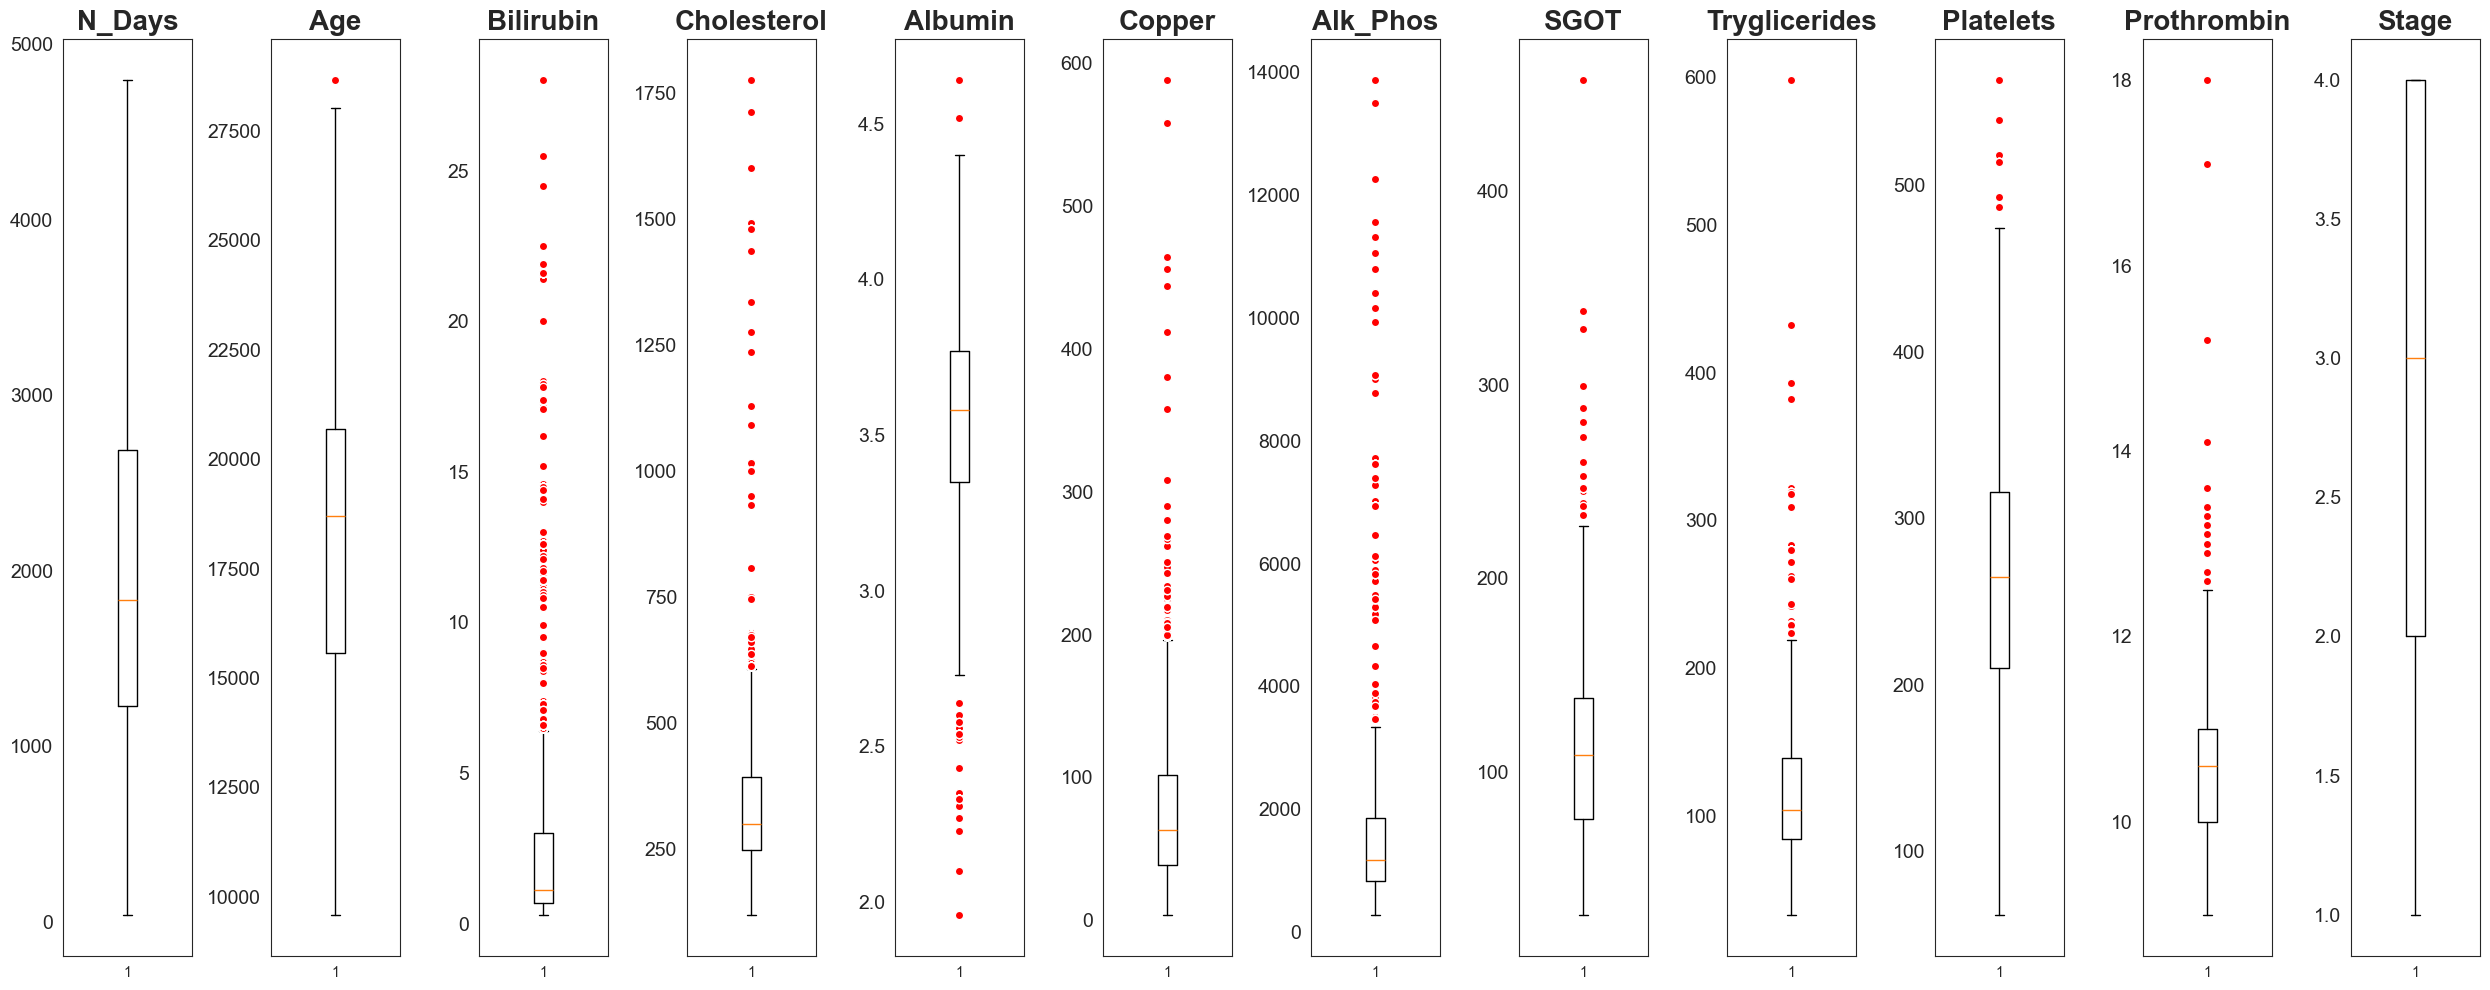

In [153]:
new_cols = [col for col in df_train.columns if col in ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets', 'Prothrombin', 'Stage']]
df_train1=df_train[new_cols]
red_circle = dict(markerfacecolor='red', marker='o',markeredgecolor='white' ) #tô màu đỏ cho các điểm ngoại lai trong đồ thị
fig, axs = plt.subplots(1, len(new_cols), figsize=(25,10)) #chuyền số cột data.columns với kích thước figsize=(30,10)
for i, ax in enumerate(axs.flat): # dùng vòng lặp for nhận tất cả các hàng từ khung dữ liệu cho các cột
    ax.boxplot(df_train1.iloc[:,i], flierprops=red_circle)
    ax.set_title(new_cols[i], fontsize=20, fontweight='bold') # thiết lập size  và kiểu chữ cho tiêu đề
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout() #tạo khoảng trống cho các ô 

**Thực hiện bỏ ngoại lai**

In [154]:
def treat_outliers(df,col):
   
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) 
    return df

def treat_outliers_all(df, col_list): # Loại bỏ giá trị ngoại lệ 
    
    for c in col_list:
        df = treat_outliers(df,c)
    return df 

In [155]:
new_cols = [col for col in df_train.columns if col in ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets', 'Prothrombin', 'Stage']]
# xử lí ngoại lai
df_train= treat_outliers_all(df_train,new_cols)

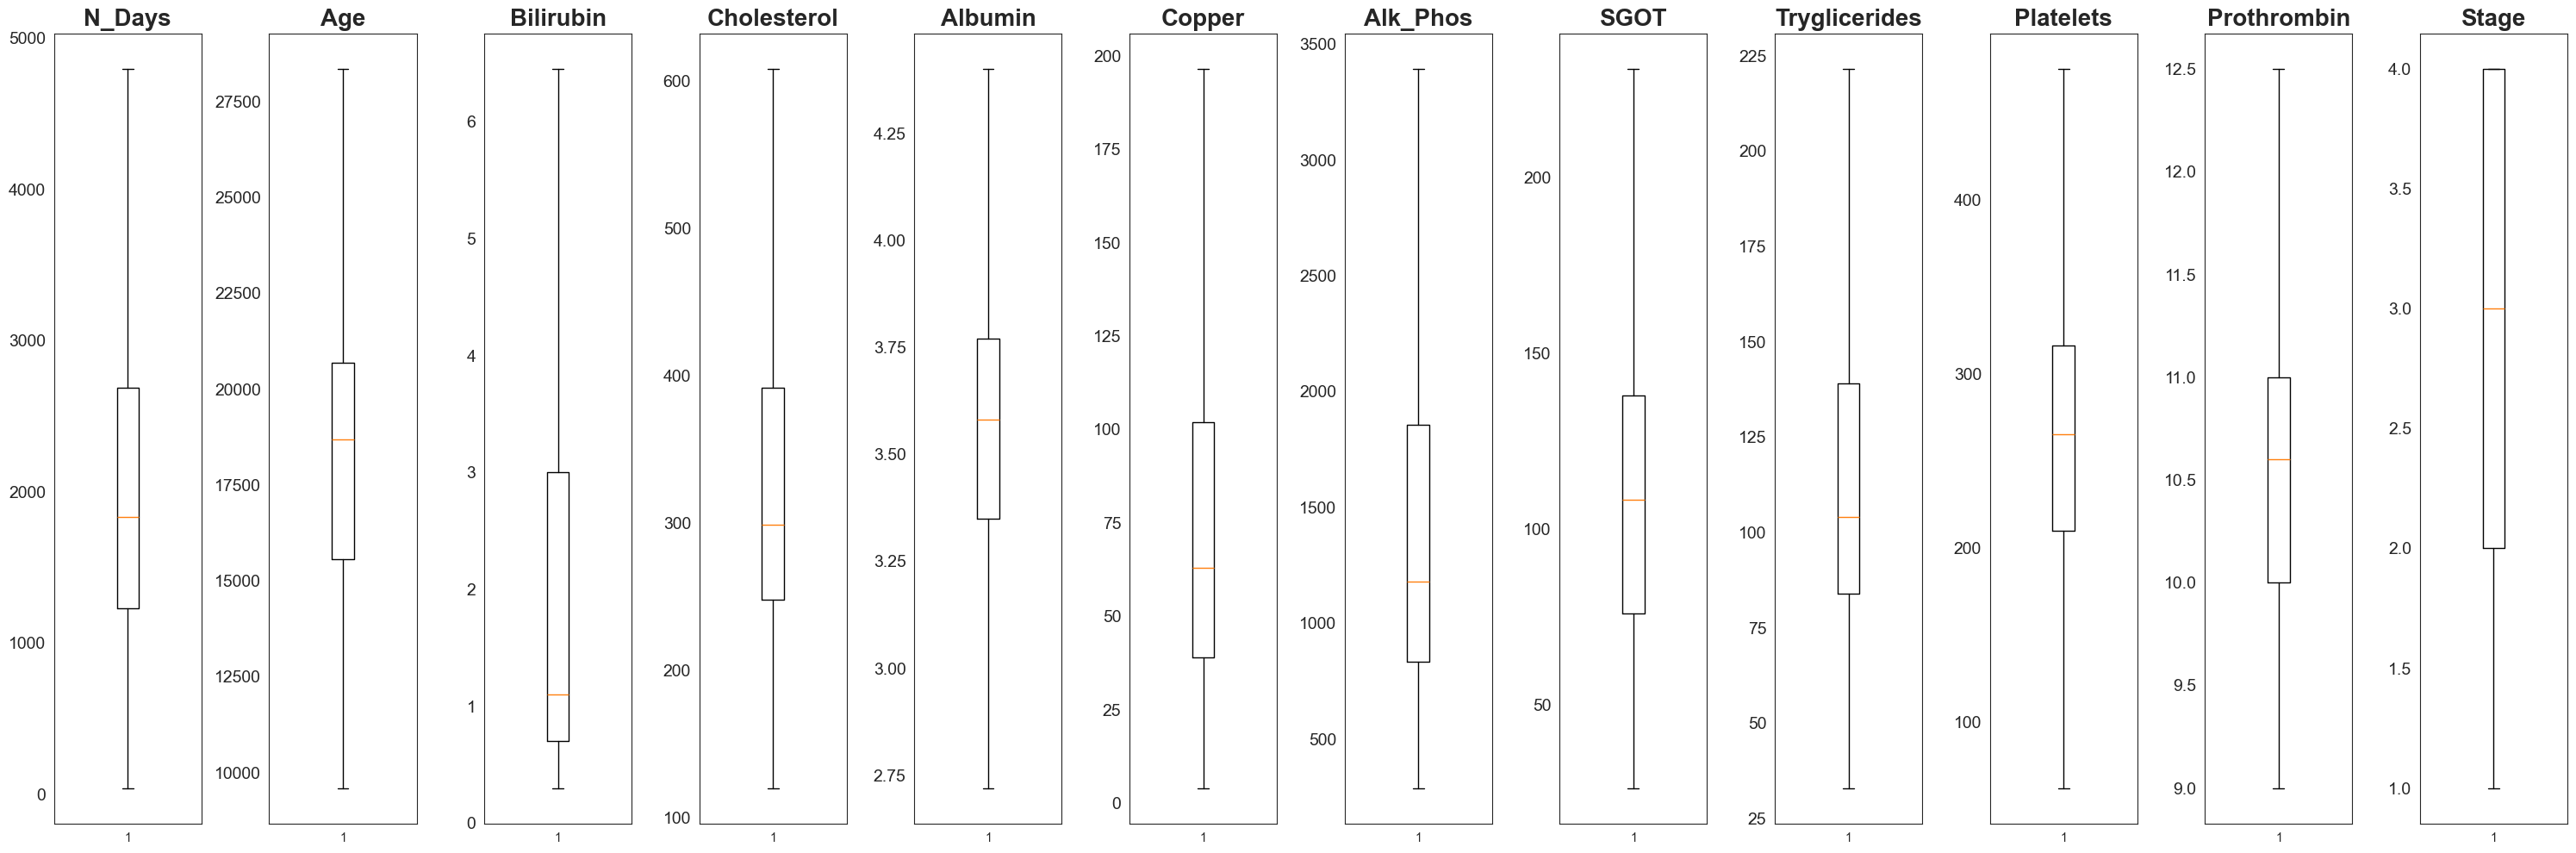

In [156]:
new_cols = [col for col in df_train.columns if col in ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets', 'Prothrombin', 'Stage']]
df=df_train[new_cols]
red_circle = dict(markerfacecolor='red', marker='o',markeredgecolor='white' ) #tô màu đỏ cho các điểm ngoại lai trong đồ thị
fig, axs = plt.subplots(1, len(new_cols), figsize=(30,10)) #chuyền số cột data.columns với kích thước figsize=(30,10)
for i, ax in enumerate(axs.flat): # dùng vòng lặp for nhận tất cả các hàng từ khung dữ liệu cho các cột
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(new_cols[i], fontsize=20, fontweight='bold') # thiết lập size  và kiểu chữ cho tiêu đề
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout() #tạo khoảng trống cho các ô 

<Axes: xlabel='Status', ylabel='count'>

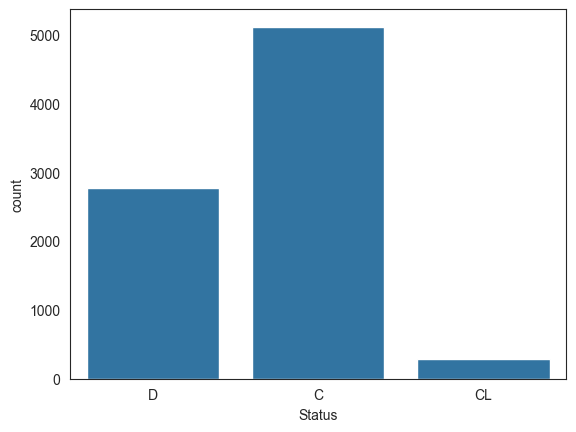

In [157]:
#Phân loại các trạng thái xơ gan
sns.countplot(x="Status", data=df_train)

<Axes: xlabel='Edema', ylabel='count'>

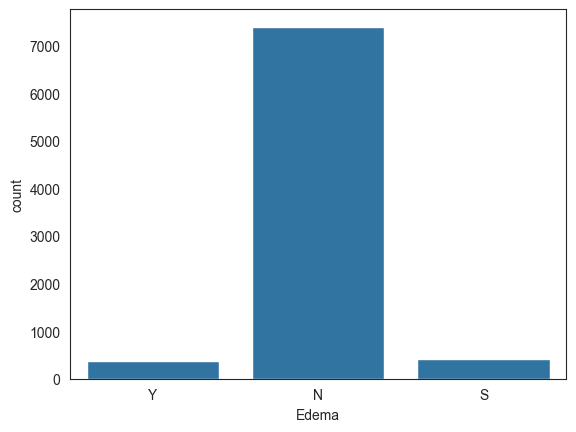

In [158]:
# Phân tích bị phù nề với khả năng xơ gan
sns.countplot(x="Edema", data=df_train)

<Axes: xlabel='Ascites', ylabel='count'>

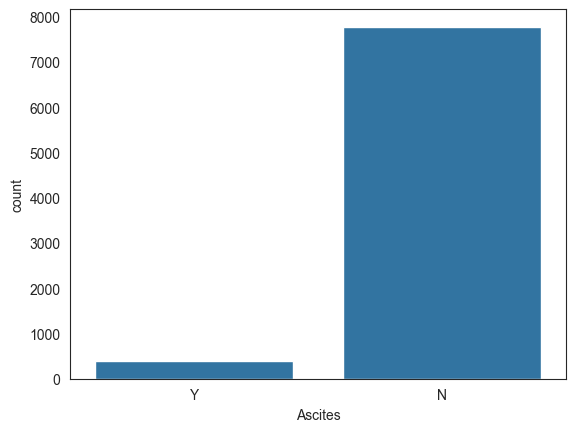

In [159]:
#Phân tích bị cổ trướng với khả năng bị xơ gan
sns.countplot(x="Ascites", data=df_train)

<Axes: xlabel='Sex', ylabel='count'>

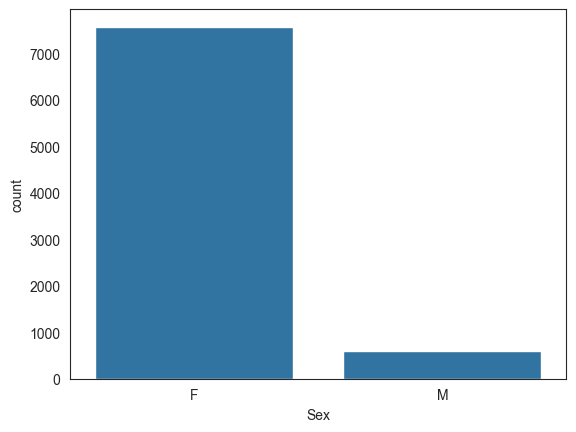

In [160]:
# Phân tích giới tính với khả năng xơ gan
sns.countplot(x="Sex", data=df_train)

**Phân cụm dữ liệu**

**1. Thuật toán KMeans**

In [186]:
#Copy dữ liệu df_train
df_train_cluster = df_train.copy()

In [187]:
#Mã hóa dữ liệu
lb_make = LabelEncoder()
df_train_cluster['Sex'] = lb_make.fit_transform(df_train_cluster['Sex'])
df_train_cluster['Ascites'] = lb_make.fit_transform(df_train_cluster['Ascites'])
df_train_cluster['Hepatomegaly'] = lb_make.fit_transform(df_train_cluster['Hepatomegaly'])
df_train_cluster['Spiders'] = lb_make.fit_transform(df_train_cluster['Spiders'])
df_train_cluster['Edema'] = lb_make.fit_transform(df_train_cluster['Edema'])
df_train_cluster['Drug'] = lb_make.fit_transform(df_train_cluster['Drug'])
df_train_cluster['Status'] = lb_make.fit_transform(df_train_cluster['Status'])

In [ ]:
# Ma trận dữ liệu huấn luyện
X = df_train_cluster.drop('Status', axis=1)

# Vector kết quả chính xác
y = df_train_cluster['Status']

In [188]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=1702)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (6544, 18)
X_test: (1637, 18)
y_train: (6544,)
y_test: (1637,)


In [190]:
# Tương quan theo Pearson
def best_features_25_by_Pirson(X_train, y_train):
    selector = SelectKBest(f_regression, k=15)
    selector.fit(X_train, y_train)
    best_features = selector.get_feature_names_out()
    return best_features

# Lựa chọn 25 đặc trưng tốt nhất dựa trên Pearson
features_corr = best_features_25_by_Pirson(X_train, y_train)
print(features_corr)

['N_Days' 'Age' 'Ascites' 'Hepatomegaly' 'Spiders' 'Edema' 'Bilirubin'
 'Cholesterol' 'Albumin' 'Copper' 'Alk_Phos' 'SGOT' 'Tryglicerides'
 'Prothrombin' 'Stage']


In [191]:
# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Tiến hành fit dữ liệu huấn luyện trên các đặc trưng quan trọng đã chọn
scaler.fit(X_train[features_corr])

# Chuẩn hóa dữ liệu huấn luyện và kiểm tra dựa trên scaler đã fit
X_train_scal = scaler.transform(X_train[features_corr])
X_test_scal = scaler.transform(X_test[features_corr])

# In ra kích thước của dữ liệu huấn luyện và kiểm tra sau khi chuẩn hóa
print(f'Kích thước X_train sau chuẩn hóa: {X_train_scal.shape}')
print(f'Kích thước X_test sau chuẩn hóa: {X_test_scal.shape}')

Kích thước X_train sau chuẩn hóa: (6544, 15)
Kích thước X_test sau chuẩn hóa: (1637, 15)


In [200]:
# Khởi tạo TSNE với số chiều mới là 3, số lần lặp là 5000, và random state là 42
tsne = TSNE(n_components=3, n_iter=5000, random_state=1702)

# Áp dụng phương pháp giảm chiều lên dữ liệu đã được chuẩn hóa
X_reduced = tsne.fit_transform(X_train_scal)

# Tạo DataFrame mới từ dữ liệu giảm chiều
df_tsne = pd.DataFrame(X_reduced)

# Thêm cột 'c' chứa nhãn của dữ liệu huấn luyện (đã chuyển thành số nguyên)
df_tsne['c'] = pd.to_numeric(y_train).astype('Int64').to_list()

In [206]:
# Lưu trữ tên cột từ DataFrame gốc
column_names_original = X_train.columns

# Khởi tạo TSNE
tsne = TSNE(n_components=3, n_iter=5000, random_state=1702)

# Áp dụng phương pháp giảm chiều
X_reduced = tsne.fit_transform(X_train_scal)

# Tạo DataFrame mới từ dữ liệu giảm chiều
df_tsne = pd.DataFrame(X_reduced, columns=['x', 'y', 'z'])  # Đặt tên cho các cột

# In ra tên cột trước khi giảm chiều
print(column_names_original[0], column_names_original[1], column_names_original[2])

N_Days Drug Age


In [207]:
x = df_tsne.values[:, 0:df_tsne.shape[1]]
clus = 4
kmeans = KMeans(n_clusters=clus).fit(x)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(x)
print(pred_label)

Centers found by scikit-learn:
[[  7.039209  -17.602125    4.76634  ]
 [ 23.032112    7.7613587  -8.576242 ]
 [-16.295023    2.6938877  -2.312581 ]
 [  3.953751   21.286146   10.590312 ]]
[0 1 0 ... 2 2 0]


**2. Thực nghiệm mô hình**

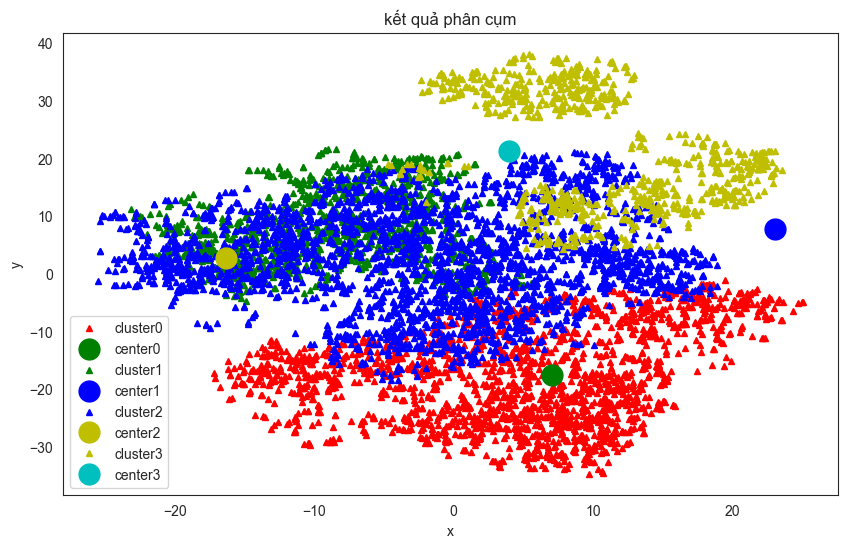

In [208]:
#Vẽ đồ thị minh họa kết quả phân cụm
fig = plt.subplots(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('y')
plt.title('kết quả phân cụm')
plt_colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(clus):
    #lấy dữ liệu của cụm i
    df_tsne = x[pred_label == i]
    #vẽ cụm i lên đồ thị
    plt.plot(df_tsne[:, 2], df_tsne[: ,1], plt_colors[i] + '^', markersize = 4, label = 'cluster' + str(i))
    #vẽ tâm cụm i lên đồ thị
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], plt_colors[i+1 ] + 'o', markersize = 15, label = 'center' + str(i))
plt.legend()
plt.show()

**Phân lớp dữ liệu**

In [161]:
# Biến mục tiêu cho thuộc tính nhãn
df_train.Status.unique()

array(['D', 'C', 'CL'], dtype=object)

In [162]:
# Copy dữ liệu của tập df_train
df_train_layer = df_train.copy()

In [163]:
#Chuyển dữ liệu của biến mục tiêu sang dạng nhị phân(Status_C - 2, Status_CL - 1, Status_D - 0)
df_train_layer['Status'] = df_train_layer['Status'].map({'C':2, 'CL':1, 'D':0})

In [164]:
df_train_layer.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,0,D-penicillamine,21464,F,Y,Y,Y,Y,6.45,261.0,2.72,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,2,D-penicillamine,20617,F,N,Y,Y,N,1.10,302.0,4.14,54.0,3391.5,113.52,88.0,221.0,10.6,3.0
2,1012,0,D-penicillamine,25594,M,N,N,N,S,1.40,176.0,3.48,196.5,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,0,D-penicillamine,19994,F,N,Y,Y,S,1.80,244.0,2.72,64.0,3391.5,60.63,92.0,183.0,10.3,4.0
4,1504,1,Placebo,13918,F,N,Y,Y,N,3.40,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [165]:
#Mã hóa dữ liệu
lb_make = LabelEncoder()
df_train_layer["Drug"] = lb_make.fit_transform(df_train_layer["Drug"])
df_train_layer["Sex"] = lb_make.fit_transform(df_train_layer["Sex"])
df_train_layer["Ascites"] = lb_make.fit_transform(df_train_layer["Ascites"])
df_train_layer["Hepatomegaly"] = lb_make.fit_transform(df_train_layer["Hepatomegaly"])
df_train_layer["Spiders"] = lb_make.fit_transform(df_train_layer["Spiders"])
df_train_layer["Edema"] = lb_make.fit_transform(df_train_layer["Edema"])

df_train_layer.head(10)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,0,0,21464,0,1,1,1,2,6.45,261.0,2.72,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,2,0,20617,0,0,1,1,0,1.10,302.0,4.14,54.0,3391.5,113.52,88.0,221.0,10.6,3.0
2,1012,0,0,25594,1,0,0,0,1,1.40,176.0,3.48,196.5,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,0,0,19994,0,0,1,1,1,1.80,244.0,2.72,64.0,3391.5,60.63,92.0,183.0,10.3,4.0
4,1504,1,1,13918,0,0,1,1,0,3.40,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
6,1832,2,1,20284,0,0,1,0,0,1.00,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,2466,0,1,19379,0,0,0,0,0,0.30,280.0,4.00,52.0,3391.5,28.38,189.0,373.0,11.0,3.0
8,2400,0,0,15526,0,0,0,1,0,3.20,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,51,0,1,25772,0,1,0,1,2,6.45,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0
10,3762,0,1,19619,0,0,1,1,0,1.40,259.0,4.16,46.0,1104.0,79.05,79.0,258.0,12.0,4.0


In [166]:
y = df_train_layer['Status']
X = df_train_layer.drop(columns=['Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

print('Tổng số dữ liệu train: %i \nTổng số dữ liệu test: %i' % (X_train.shape[0],X_test.shape[1]))

Tổng số dữ liệu train: 6544 
Tổng số dữ liệu test: 18


In [167]:
X_train

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
7547,2106,0,19237,1,0,0,0,0,1.1,458.0,3.74,75.0,1065.0,85.25,111.0,251.0,10.8,2.0
2056,3853,1,20296,0,0,1,0,0,0.6,236.0,3.63,84.0,1636.0,26.35,95.0,151.0,11.0,3.0
1228,1658,1,15730,0,0,1,1,0,1.1,302.0,3.60,73.0,2108.0,128.65,88.0,151.0,10.9,4.0
4056,1295,0,12398,0,0,0,0,0,1.0,354.0,3.59,79.0,1120.0,97.65,152.0,248.0,10.6,3.0
1932,1770,0,22960,0,0,0,0,1,1.1,246.0,3.67,74.0,1556.0,91.00,113.0,225.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073,4032,0,16802,1,0,0,1,0,2.3,175.0,3.06,91.0,2544.0,221.88,75.0,121.0,12.2,4.0
3406,1932,0,18329,0,0,1,0,0,0.8,364.0,3.06,47.0,1840.0,170.50,64.0,265.0,10.6,3.0
1795,2301,1,18215,0,0,1,0,0,0.7,242.0,3.50,58.0,591.0,43.40,113.0,410.0,11.5,4.0
2749,943,0,13736,0,0,1,0,0,5.6,608.0,3.55,196.5,2412.0,167.40,140.0,475.0,9.8,3.0


In [168]:
print(y_train)

7547    2
2056    2
1228    0
4056    2
1932    2
       ..
5073    2
3406    2
1795    2
2749    0
2874    2
Name: Status, Length: 6544, dtype: int64


In [169]:
X_test

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
5664,769,1,22369,0,0,1,0,0,1.10,364.0,3.58,24.0,1833.0,134.85,85.0,233.0,10.0,4.0
5013,873,0,17233,0,0,0,1,0,2.10,546.0,3.06,121.0,1142.0,110.05,90.0,129.0,10.0,3.0
58,2224,0,14754,0,0,1,1,0,0.80,329.0,3.50,49.0,3391.5,126.42,124.0,321.0,10.6,3.0
2668,3445,1,20662,0,0,1,1,0,1.30,227.0,3.74,101.0,1136.0,82.56,91.0,264.0,12.0,4.0
1202,3445,1,20256,0,0,1,1,0,2.00,267.0,3.34,89.0,754.0,196.85,87.0,136.0,11.8,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,2573,1,17180,0,0,1,0,0,2.10,267.0,3.57,103.0,1387.0,137.95,87.0,283.0,11.0,4.0
4534,1735,1,12897,0,0,1,1,0,1.00,608.0,3.22,96.0,3150.0,210.80,133.0,283.0,9.9,3.0
6967,2297,0,18713,0,0,0,0,0,0.80,328.0,3.61,52.0,3391.5,116.25,95.0,213.0,11.4,1.0
5128,1765,1,28349,1,1,1,1,0,6.45,243.0,3.03,196.5,933.0,158.10,154.0,97.0,11.0,4.0


**1. Cây quyết định**

In [170]:
# Khai báo mô hình cây quyết định
model=tree.DecisionTreeClassifier(criterion = "entropy", random_state = 1702, max_depth = 10, min_samples_leaf = 5)

In [171]:
# Thực thi mô hình
model = model.fit(X_train,y_train)

In [172]:
# Kiểm thử mô hình
y_pred = model.predict(X_test)
print("Giá trị nhãn mô hình dự đoán được:\n " ,y_pred)
print('Giá trị nhãn thực tế là: \n', y_test)

Giá trị nhãn mô hình dự đoán được:
  [0 0 2 ... 2 2 2]
Giá trị nhãn thực tế là: 
 5664    2
5013    1
58      0
2668    0
1202    0
       ..
6182    1
4534    2
6967    0
5128    2
4554    2
Name: Status, Length: 1637, dtype: int64


In [173]:
# Độ chính xác của mô hình
print('Độ chính xác của mô hình là: ',accuracy_score(y_test,y_pred)*100,'%')

Độ chính xác của mô hình là:  78.43616371411119 %


In [174]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Confusion Matrix: 
 [[386   6 165]
 [ 19  17  30]
 [119  14 881]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.69      0.71       557
           1       0.46      0.26      0.33        66
           2       0.82      0.87      0.84      1014

    accuracy                           0.78      1637
   macro avg       0.67      0.61      0.63      1637
weighted avg       0.78      0.78      0.78      1637



**2. LGBM Classifier**

In [175]:
model = LGBMClassifier(random_state=1702, max_depth=10, num_leaves=31)
model.fit(X_train, y_train)

y_lgbm_pred = model.predict(X_test)

print("Giá trị nhãn mô hình dự đoán được:\n " ,y_lgbm_pred)
print('Giá trị nhãn thực tế là: \n', y_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1768
[LightGBM] [Info] Number of data points in the train set: 6544, number of used features: 18
[LightGBM] [Info] Start training from score -1.081492
[LightGBM] [Info] Start training from score -3.361354
[LightGBM] [Info] Start training from score -0.468050
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Giá trị nhãn mô hình dự đoán được:
  [0 0 2 ... 2 2 2]
Giá trị nhãn thực tế là: 
 5664    2
5013    1
58      0
2668    0
1202    0
       ..
6182    1
4534    

In [176]:
# Độ chính xác của mô hình
print('Độ chính xác của mô hình là: ',accuracy_score(y_test,y_lgbm_pred)*100,'%')

Độ chính xác của mô hình là:  83.01771533292609 %


In [177]:
print('Confusion Matrix: \n', confusion_matrix(y_test, y_lgbm_pred))
print('Classification Report: \n', classification_report(y_test, y_lgbm_pred))

Confusion Matrix: 
 [[412   2 143]
 [ 21  15  30]
 [ 80   2 932]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       557
           1       0.79      0.23      0.35        66
           2       0.84      0.92      0.88      1014

    accuracy                           0.83      1637
   macro avg       0.81      0.63      0.67      1637
weighted avg       0.83      0.83      0.82      1637



**Khai phá luật kết hợp**

In [178]:
# Chuẩn hóa dữ liệu Billirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin
df_filter = df_train.copy()

#Billirubin
billirubin_conditions = [(df_filter['Bilirubin'] < 1.2),(df_filter['Bilirubin'] >= 1.2)]
billirubin_values = ['Normal', 'High']

df_filter['Bilirubin'] = np.select(billirubin_conditions, billirubin_values, default='Unknown')

#Cholesterol
cholesterol_conditions = [(df_filter['Cholesterol'] < 200),(df_filter['Cholesterol'] >=200) & (df_filter['Cholesterol'] <= 239),(df_filter['Cholesterol'] >239)]
cholesterol_values = ['Normal', 'Borderline High', 'High']

df_filter['Cholesterol'] = np.select(cholesterol_conditions, cholesterol_values, default='Unknown')

#Albumin

albumin_conditions = [(df_filter['Albumin'] <= 3.5),(df_filter['Albumin'] <= 5.5) & (df_filter['Albumin'] > 3.5),(df_filter['Albumin'] >5.5)]
albumin_values = ['Low', 'Normal', 'High']

df_filter['Albumin'] = np.select(albumin_conditions, albumin_values, default='Unknown')


#Copper
copper_conditions = [(df_filter['Copper'] <= 70),(df_filter['Copper'] <= 140) & (df_filter['Copper'] > 70),(df_filter['Copper'] >140)]
copper_values = ['Low', 'Normal', 'High']

df_filter['Copper'] = np.select(copper_conditions, copper_values, default='Unknown')

#Alk_Phos
alk_phos_conditions = [(df_filter['Alk_Phos'] >= 200) & (df_filter['Alk_Phos'] <=1400), (df_filter['Alk_Phos'] < 200), (df_filter['Alk_Phos'] > 1400)]
alk_phos_values = ['Normal', 'Low', 'High']

df_filter['Alk_Phos'] = np.select(alk_phos_conditions, alk_phos_values, default='Unknown')

#SGOT
sgot_conditions = [(df_filter['SGOT'] >= 7) & (df_filter['SGOT'] <=56), (df_filter['SGOT'] < 7), (df_filter['SGOT'] > 56)]
sgot_values = ['Normal', 'Low', 'High']

df_filter['SGOT'] = np.select(sgot_conditions, sgot_values, default='Unknown')

#Platelets	
platelets_conditions = [(df_filter['Platelets'] >= 150) & (df_filter['Platelets'] <=450), (df_filter['Platelets'] < 150), (df_filter['Platelets'] > 450)]
platelets_values = ['Normal', 'Low', 'High']

df_filter['Platelets'] = np.select(platelets_conditions, platelets_values, default='Unknown')

#Prothrombin
prothrombin_conditions = [(df_filter['Prothrombin'] >= 11) & (df_filter['Prothrombin'] <=13.5), (df_filter['Prothrombin'] < 11), (df_filter['Prothrombin'] > 13.5)]
prothrombin_values = ['Normal', 'Fast', 'Slow']

df_filter['Prothrombin'] = np.select(prothrombin_conditions, prothrombin_values, default='Unknown')

drop_columns = ['Age', 'N_Days', 'Tryglicerides','Stage','Ascites','Hepatomegaly','Spiders','Edema']
df_filter_v2 = df_filter.drop(columns=drop_columns)
df_filter_v2

,Status,Drug,Sex,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Platelets,Prothrombin
0,D,D-penicillamine,F,High,High,Low,High,High,High,Normal,Normal
1,C,D-penicillamine,F,Normal,High,Normal,Low,High,High,Normal,Fast
2,D,D-penicillamine,M,High,Normal,Low,High,Normal,High,Normal,Normal
3,D,D-penicillamine,F,High,High,Low,Low,High,High,Normal,Fast
4,CL,Placebo,F,High,High,Normal,High,Normal,High,Low,Fast
...,...,...,...,...,...,...,...,...,...,...,...
8318,C,D-penicillamine,F,Normal,High,Normal,Low,High,High,Normal,Fast
8319,C,Placebo,F,Normal,High,Low,Low,High,High,Normal,Fast
8320,D,D-penicillamine,F,High,Borderline High,Low,Low,Normal,High,Normal,Normal
8321,D,D-penicillamine,M,Normal,High,Low,Low,Normal,High,Normal,Fast


In [179]:
df_encoded = pd.get_dummies(df_filter_v2)
# Tính độ hỗ trợ cho các tập phổ biến
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
# Tạo các quy luật kết hợp dựa trên độ tin cậy
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
# In ra các quy luật kết hợp
rules.iloc[:, [0, 1, 4, 5, 6]]

,antecedents,consequents,support,confidence,lift
0,(Drug_D-penicillamine),(Status_C),0.302530,0.613992,0.982603
1,(Status_C),(Drug_D-penicillamine),0.302530,0.484155,0.982603
2,(Status_C),(Drug_Placebo),0.322332,0.515845,1.016898
3,(Drug_Placebo),(Status_C),0.322332,0.635422,1.016898
4,(Sex_F),(Status_C),0.595526,0.642914,1.028888
...,...,...,...,...,...
26519,(Platelets_Normal),"(SGOT_High, Bilirubin_Normal, Sex_F, Alk_Phos_...",0.206332,0.232699,1.059973
26520,(Sex_F),"(SGOT_High, Bilirubin_Normal, Platelets_Normal...",0.206332,0.222750,1.049723
26521,(Alk_Phos_Normal),"(SGOT_High, Bilirubin_Normal, Platelets_Normal...",0.206332,0.346043,1.213451
26522,(Prothrombin_Fast),"(SGOT_High, Bilirubin_Normal, Platelets_Normal...",0.206332,0.302889,1.221861


Antecedents và Consequents: 

Antecedents (Tiền đề): 
- Các mục hoặc điều kiện xuất hiện trước hoặc đồng thời với một tập hợp khác.

Consequents (Hậu quả): 
- Các mục hoặc điều kiện dự kiến xuất hiện sau khi có một tập hợp khác.

Support:
- Tỉ lệ giao dịch trong tập dữ liệu chứa cả tiền đề và hậu quả.

Confidence (Độ tin cậy):
- Xác suất có điều kiện rằng một giao dịch chứa tập hợp hậu quả khi đã có tập hợp tiền đề. Toán học, Confidence được định nghĩa là Support(tiền đề và hậu quả) / Support(tiền đề).

Lift (Tăng cường):
- Tỉ lệ giữa hỗ trợ quan sát được và hỗ trợ kỳ vọng nếu tiền đề và hậu quả là độc lập. Giá trị Lift lớn hơn 1 thể hiện rằng sự xuất hiện của tiền đề tăng khả năng xuất hiện của hậu quả.

In [180]:
# So sánh sự khác biệt của các ngưỡng hỗ trợ và ngưỡng tin cậy
conf_levels = []
num_rules = []
support_levels = []
for sp_level in [0.2, 0.3, 0.4, 0.45]:
    for conf_level in [0, 0.2, 0.4, 0.6, 0.8, 0.9, 1]:
        rule_df = association_rules(apriori(df_encoded, min_support=sp_level), 
                          metric="confidence", min_threshold=conf_level)
        num_rules.append(len(rule_df))
        conf_levels.append(conf_level)
        support_levels.append('Support level of {}%'.format(str(sp_level*100)))

([<matplotlib.axis.XTick at 0x1eca48da0b0>,
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9'),
  Text(1.0, 0, '1.0')])

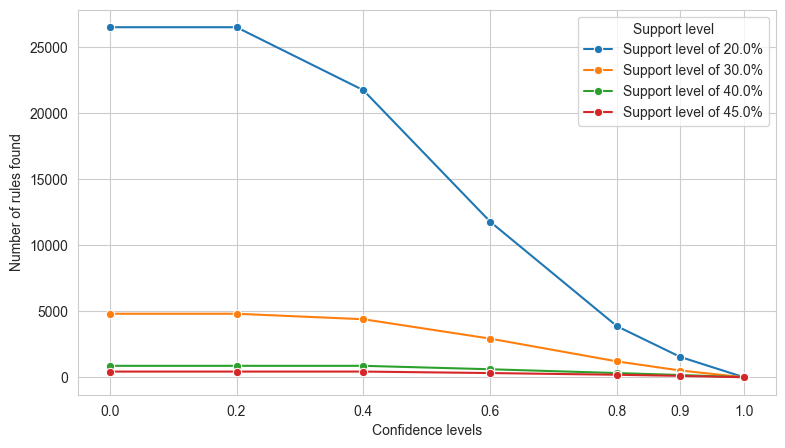

In [181]:
#Vẽ biểu đồ
sns.set_style("whitegrid")
test_df = pd.DataFrame({'Confidence levels': conf_levels,
                        'Number of rules found': num_rules,
                        'Support level': support_levels})
plt.figure(figsize=(9, 5))
sns.lineplot(data=test_df, x='Confidence levels', y='Number of rules found', hue='Support level',
             marker='o')
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 0.9, 1])

**Ngưỡng hỗ trợ 45%:** 
Chỉ tạo ra cực ít luật kết hợp, không thể chọn giá trị này

**Ngưỡng hỗ trợ 40%:**
Tương tự như ngưỡng 45%, còn khi tăng độ tin cậy lên thì sinh ra rất ít

**Ngưỡng hỗ trợ 30%:** 
Tạo ra khá nhiều luật kết hợp, khoảng 5000 với ngưỡng tin cậy 20% và trên 2500 với ngưỡng tin cậy 60%

**Ngưỡng hỗ trợ 20%:**
Tạo ra rất nhiều luật kết hợp (Sử dụng ngưỡng tin cậy này)

**Kết luận:**
Sử dụng min support 20% và ngưỡng tin cậy là 40%. 


**1. Thực nghiệm mô hình**

In [182]:
rule_df = association_rules(apriori(df_encoded, min_support=0.2, use_colnames=True), metric='confidence', min_threshold=0.4)
rule_df.iloc[:, [0, 1, 4, 5, 6]]

,antecedents,consequents,support,confidence,lift
0,(Drug_D-penicillamine),(Status_C),0.302530,0.613992,0.982603
1,(Status_C),(Drug_D-penicillamine),0.302530,0.484155,0.982603
2,(Status_C),(Drug_Placebo),0.322332,0.515845,1.016898
3,(Drug_Placebo),(Status_C),0.322332,0.635422,1.016898
4,(Sex_F),(Status_C),0.595526,0.642914,1.028888
...,...,...,...,...,...
21746,"(Bilirubin_Normal, Prothrombin_Fast)","(SGOT_High, Platelets_Normal, Sex_F, Alk_Phos_...",0.206332,0.475493,1.536338
21747,"(Bilirubin_Normal, Copper_Low)","(SGOT_High, Platelets_Normal, Sex_F, Alk_Phos_...",0.206332,0.484918,1.445215
21748,"(Prothrombin_Fast, Alk_Phos_Normal)","(SGOT_High, Bilirubin_Normal, Platelets_Normal...",0.206332,0.482838,1.414790
21749,"(Copper_Low, Alk_Phos_Normal)","(SGOT_High, Bilirubin_Normal, Platelets_Normal...",0.206332,0.515892,1.464440


<Axes: xlabel='support', ylabel='confidence'>

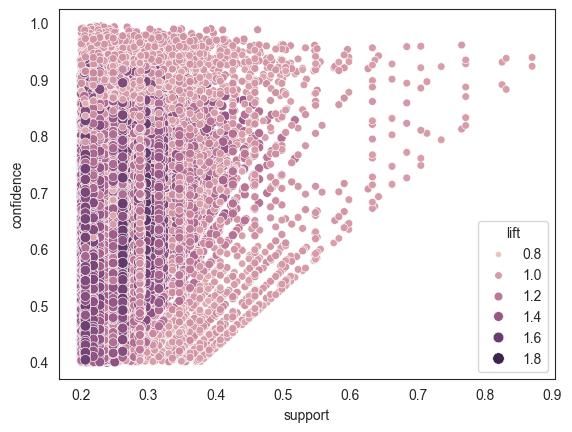

In [183]:
# Biểu đồ scatter biểu diễn mối quan hệ support, confidence and lift
sns.set_style('white')
sns.scatterplot(data=rule_df, x='support', y='confidence', hue='lift', size='lift')

In [184]:
# Top 5 luật có confidence cao nhất
support_df = rule_df.sort_values(by='confidence', ascending=False).head()
support_df.iloc[:, [0, 1, 4, 5, 6]]

,antecedents,consequents,support,confidence,lift
580,"(Bilirubin_High, Drug_D-penicillamine)",(SGOT_High),0.229923,0.994712,1.056026
3036,"(Status_D, Cholesterol_High, Bilirubin_High)",(SGOT_High),0.220389,0.994484,1.055785
4774,"(Bilirubin_High, Alk_Phos_High, Cholesterol_High)",(SGOT_High),0.223567,0.993482,1.054720
1139,"(Bilirubin_High, Alk_Phos_High)",(SGOT_High),0.249236,0.993181,1.054401
3902,"(Bilirubin_High, Sex_F, Alk_Phos_High)",(SGOT_High),0.221489,0.992877,1.054078
